<a href="https://colab.research.google.com/github/icarusrodrigues/queue-simulations/blob/main/MM1_Queue_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **M/M/1 Queue**

An M/M/1 queue is a queuing model used in Queuing Theory to analyze the behavior of queuing systems with a single service and customer arrival following a Poisson process (M) and exponential service times (M).

In [1]:
!pip install simpy

In [2]:
import numpy as np
import simpy as sp
import matplotlib.pyplot as plt

In [3]:
class MM1Queue:

  def __init__(self, arrival_rate, service_rate, horizon):
    self.env = sp.Environment()
    self.n = 0
    self.arrival_rate = arrival_rate
    self.service_rate = service_rate
    self.horizon = horizon
    self.queue_total = 0
    self.times_queue = []
    self.people_queue = []

  def arrive(self):
    while True:
      yield self.env.timeout(np.random.exponential(1/self.arrival_rate))
      self.n += 1
      print(f"Someone arrived!\n- n = {self.n}, t = {self.env.now})\n")

      self.queue_total += self.n
      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      if self.n == 1:
        self.env.process(self.service())

  def service(self):
    while self.n > 0:
      yield self.env.timeout(np.random.exponential(1/self.service_rate))
      self.n -= 1
      self.times_queue.append(self.env.now)
      self.people_queue.append(self.n)

      print(f"Someone was attended to!\n- n = {self.n}, t = {self.env.now})\n")

  def run_simulation(self):
    self.env.process(self.arrive())

    if self.n > 0:
      self.env.process(self.service())

    self.env.run(until=self.horizon)

    print("End of simulation!")

Example of simulation using arrival rate of 7 people per minute, service rate of 5 people per minute, in a period (horizon) of 30 minutes in system with 3 servers. It's possible to see the size of the queue when someone arrives or leaves.

In [4]:
arrival_rate = 7
service_rate = 5
horizonte = 30

mm1_queue = MM1Queue(arrival_rate, service_rate, horizonte)

mm1_queue.run_simulation()

Someone arrived!
- n = 1, t = 0.32736533286991415)

Someone arrived!
- n = 2, t = 0.3835592580326613)

Someone was attended to!
- n = 1, t = 0.4019816600840801)

Someone arrived!
- n = 2, t = 0.4992987118740946)

Someone arrived!
- n = 3, t = 0.5726643235686256)

Someone was attended to!
- n = 2, t = 0.6442323777292929)

Someone arrived!
- n = 3, t = 0.6905430090160957)

Someone arrived!
- n = 4, t = 0.6943921881688006)

Someone arrived!
- n = 5, t = 0.8811596457334462)

Someone arrived!
- n = 6, t = 0.9637813714843309)

Someone arrived!
- n = 7, t = 1.1405518639331427)

Someone arrived!
- n = 8, t = 1.2852796660318275)

Someone arrived!
- n = 9, t = 1.2990359551713822)

Someone arrived!
- n = 10, t = 1.3385274770648707)

Someone arrived!
- n = 11, t = 1.3735047998356047)

Someone arrived!
- n = 12, t = 1.4036658199995073)

Someone arrived!
- n = 13, t = 1.4108482808234133)

Someone arrived!
- n = 14, t = 1.4663723283416936)

Someone arrived!
- n = 15, t = 1.5592429888744364)

Someone 

Below there is a graph showing how the queue behaves over time.

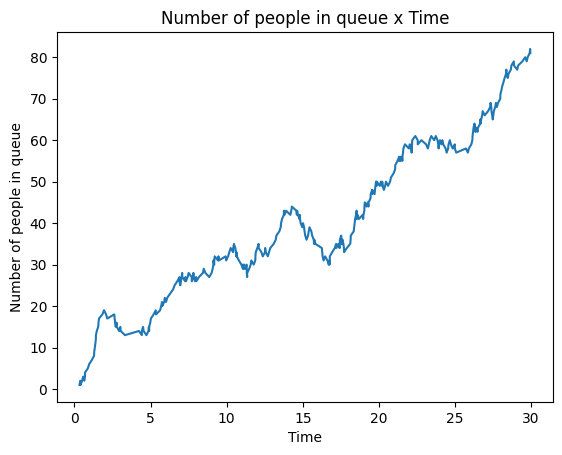

In [5]:
plt.plot(mm1_queue.times_queue, mm1_queue.people_queue)
plt.title("Number of people in queue x Time")
plt.xlabel("Time")
plt.ylabel("Number of people in queue")
plt.show()